In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge

plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

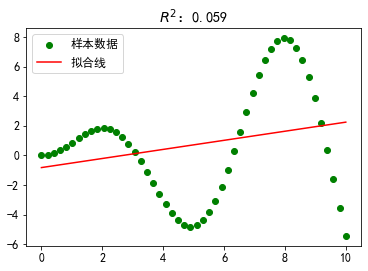

In [2]:
x = np.linspace(0, 10, 50)
# 构造非线性数据。
y = x * np.sin(x)
# 为x扩展一个维度，从一维变成二维。也可以通过reshape来实现同样的功能。
X = x[:, np.newaxis]
lr = LinearRegression()
lr.fit(X, y)
plt.scatter(x, y, c="g", label="样本数据")
plt.plot(X, lr.predict(X), "r-", label="拟合线")
plt.legend()
plt.title(f"$R^2$：{lr.score(X, y):.3f}")
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([[1, 2], [3, 4]])
# degree：扩展的阶数。阶数越高，则输出特征越多。
# include_bias：是否包含偏置，默认为True。
poly = PolynomialFeatures(2, include_bias=True)
# 对输入数据进行转换。
# 相当于调用fit之后，再调用transform。
# poly.fit(X)
# r = poly.transform(X)
r = poly.fit_transform(X)
print("转换之后的结果：")
print(r)
print("指数矩阵：")
print(poly.powers_)
print("输入的特征数量：", poly.n_input_features_)
print("输出的特征数量：", poly.n_output_features_)
for x1, x2 in X:
    for e1, e2 in poly.powers_:
        print(x1 ** e1 * x2 ** e2, end="\t")
    print()

转换之后的结果：
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]
指数矩阵：
[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]
输入的特征数量： 2
输出的特征数量： 6
1	1	2	1	2	4	
1	3	4	9	12	16	


D:\software\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


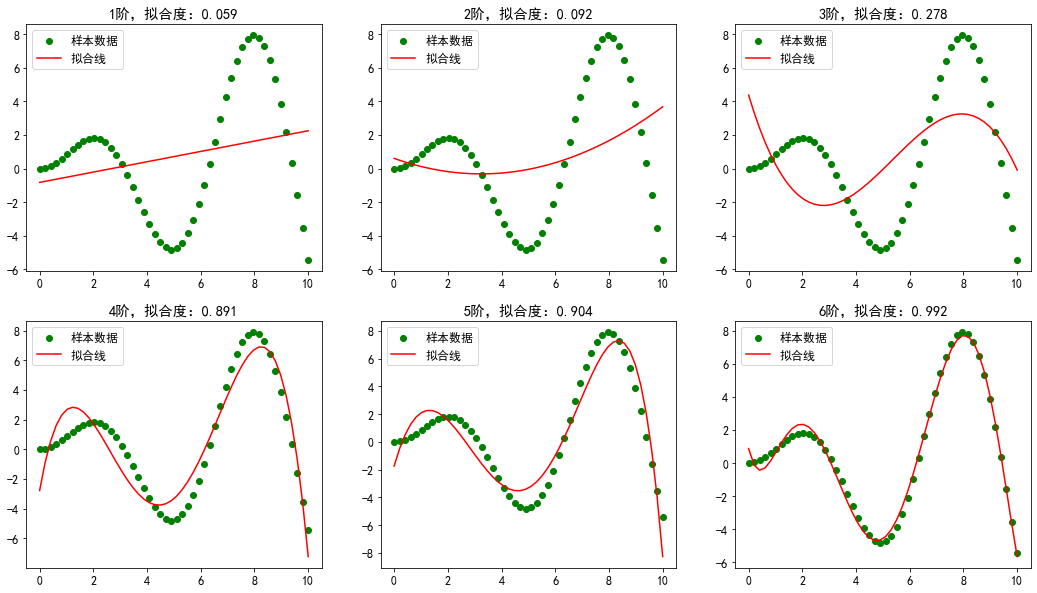

In [4]:
x = np.linspace(0, 10, 50)
y = x * np.sin(x)
X = x[:, np.newaxis]
figure, ax = plt.subplots(2, 3)
figure.set_size_inches(18, 10)
ax = ax.ravel()
# 进行1阶到6阶的多项式扩展。（1阶相当于没有扩展）
for n in range(1, 7):
    poly = PolynomialFeatures(degree=n, include_bias=False)
    X_transform = poly.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_transform, y)
    ax[n - 1].set_title(f"{n}阶，拟合度：{lr.score(X_transform, y):.3f}")
    ax[n - 1].scatter(x, y, c="g", label="样本数据")
    ax[n - 1].plot(x, lr.predict(X_transform), "r-", label="拟合线")
    ax[n - 1].legend()

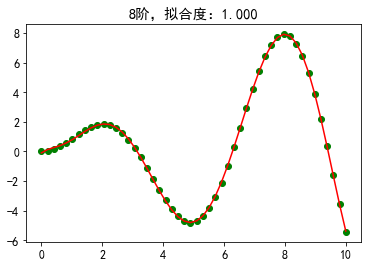

In [5]:
from sklearn.pipeline import Pipeline

x = np.linspace(0, 10, 50)
y = x * np.sin(x)
X = x[:, np.newaxis]
# 定义流水线的步骤。类型为一个列表，列表中的每个元素是元组类型，
# 格式为：[(步骤名1，评估器1), (步骤名2， 评估器2)，……， (步骤名n, 评估器n)
steps = [("poly", PolynomialFeatures(include_bias=False)), ("lr", LinearRegression())]
pipe = Pipeline(steps)
# 设置流水线的参数。所有可用的参数，可以通过pipeline.get_params()获取。
pipe.set_params(poly__degree=8)
pipe.fit(X, y)
score = pipe.score(X, y)
plt.title(f"8阶，拟合度：{score:.3f}")
plt.scatter(X, y, c="g", label="样本数据")
plt.plot(X, pipe.predict(X), "r-", label="拟合线")

In [6]:
from sklearn.model_selection import train_test_split

def true_fun(x):
    """数据分布的函数，用于生成由x -> y的映射。
    根据x数组中的每个元素，返回该元素的余弦计算值y。
    Parameters
    ----------
    x : array-like
    训练数据集。
    Returns
    -------
    y : array-like
    x对应的余弦映射结果。
    """
    return np.cos(1.5 * np.pi * x)

In [7]:
def fit_and_plot(model):
    """用来训练模型，并且绘制模型的拟合效果。
    Parameters
    ----------
    model : object
    模型对象。
    """
    np.random.seed(0)
    x = np.random.rand(50)
    # 在映射函数上，增加一定的误差（噪声）。这样更符合现实中数据的分布。
    # 误差服从正态分布。
    y = true_fun(x) + np.random.randn(len(x)) * 0.1
    
    X = x[:, np.newaxis]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    plt.scatter(X_train, y_train, c="g", label="训练集")
    plt.scatter(X_test, y_test, c="orange", marker="D", label="测试集")
    
    s = np.linspace(0, 1, 100).reshape(-1, 1)
    plt.plot(s, model.predict(s), c="r", label="拟合线")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="upper center")
    plt.title(f"训练集：{train_score:.3f} 测试集：{test_score:.3f}")

[-1.65201925]
[-3.89922088 -3.34968481  5.92093622]
[ 2.82447079e+01 -4.99295928e+02  3.53686879e+03 -1.31271460e+04
  2.71571014e+04 -3.15089674e+04  1.91826234e+04 -4.77061916e+03]
[ 2.07071311e+04 -4.97833841e+05  6.76423888e+06 -5.85834707e+07
  3.45651499e+08 -1.44778371e+09  4.41812369e+09 -9.97113468e+09
  1.67390055e+10 -2.08331288e+10  1.89560333e+10 -1.22494207e+10
  5.32316771e+09 -1.39466930e+09  1.66452216e+08]


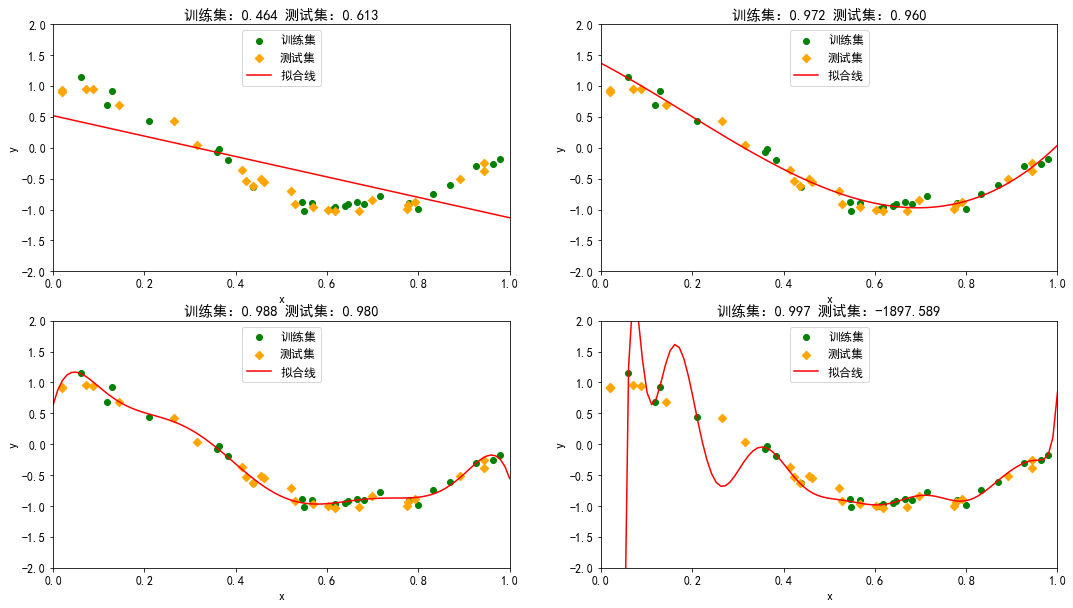

In [8]:
# 定义多项式扩展的阶数。
degrees = [1, 3, 8, 15]
plt.figure(figsize=(18, 10))
for i, n in enumerate(degrees):
    plt.subplot(2, 2, i + 1)
    pipe = Pipeline([("poly", PolynomialFeatures(degree=n, include_bias=False)),
                     ("lr", LinearRegression())])
    fit_and_plot(pipe)
    # named_steps返回字典对象，提供流水线中每个步骤的名称（key）与对象（value）的映射。
    print(pipe.named_steps["lr"].coef_)

Text(0, 0.5, 'weights')

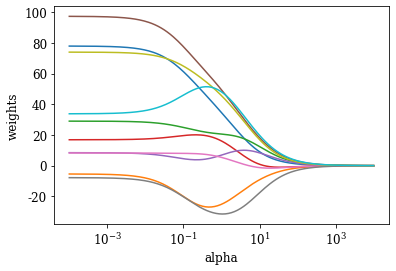

In [12]:
# 注意：当坐标轴使用对数比例后，这里需要改成英文字体，否则无法正常显示。
plt.rcParams["font.family"] = "serif"
# 创建回归数据集。
# n_samples：样本数量。
# n_features：特征数量。
# coef：是否返回权重。默认为False。
# random_state：随机种子。
# bias：偏置。
# noise：增加的噪声干扰，值越大，干扰越大。
X, y, w = make_regression(n_samples=10, n_features=10, coef=True, random_state=1, bias=3.5, noise=0.0)
alphas = np.logspace(-4, 4, 200)
# 定义列表，用来保存在不同alpha取值下，模型最优的权重（w）值。
coefs = []
# 创建岭回归对象。
ridge = Ridge()

for a in alphas:
    # alpha：惩罚力度，值越大，惩罚力度越大。
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    # 将每个alpha取值下，Ridge回归拟合的最佳解（w）加入到列表中。
    coefs.append(ridge.coef_)
    
# gca get current axes 获取当前的绘图对象。
ax = plt.gca()
# 当y是二维数组时，每一列会认为是一个单独的数据集。
ax.plot(alphas, coefs)
# 设置x轴的比例。（对数比例）
ax.set_xscale("log")
# 设置x轴的标签。
ax.set_xlabel("alpha")
# 设置y轴的标签。
ax.set_ylabel("weights")

In [13]:
from sklearn.linear_model import Lasso
X, y = make_regression(n_samples=10, n_features=10, coef=False, random_state=1, bias=3.5, noise=1)
lasso = Lasso(alpha=1)
lasso.fit(X, y)
print(lasso.coef_)

[54.14243012 71.93458854  3.52415557 13.50646852 36.90416205  5.6709588
 -0.         -0.         73.44001013 71.26297921]


In [14]:
from sklearn.feature_selection import SelectFromModel

# estimator：评估器，即SelectFromModel类要进行特征选择的模型。
# threshold：阈值，当特征权重小于阈值时，丢弃该特征。
# prefit：传入的评估器（estimator参数）是否已经训练过了。默认为False。
sfm = SelectFromModel(estimator=lasso, threshold=1e-5, prefit=True)
X_transform = sfm.transform(X)
print(X_transform[:3])
# 返回布尔数组，用来表示是否选择对应的特征，True为选择，False为丢弃。
print(sfm.get_support())

[[ 1.13376944 -0.3224172  -0.17242821 -1.09989127 -2.06014071 -0.87785842
  -0.38405435  1.46210794]
 [ 0.19829972  0.18656139 -0.67066229  0.11900865 -0.20075807  0.37756379
   0.41005165 -0.22232814]
 [ 0.86540763 -0.52817175  1.74481176 -2.3015387  -0.61175641 -0.7612069
  -1.07296862  1.62434536]]
[ True  True  True  True  True  True False False  True  True]


[ 2.07071311e+04 -4.97833841e+05  6.76423888e+06 -5.85834707e+07
  3.45651499e+08 -1.44778371e+09  4.41812369e+09 -9.97113468e+09
  1.67390055e+10 -2.08331288e+10  1.89560333e+10 -1.22494207e+10
  5.32316771e+09 -1.39466930e+09  1.66452216e+08]
[-2.28050995 -0.          0.          0.          0.          0.
  1.37135264  0.          0.          0.          0.          0.
  0.          0.          0.        ]
[-3.54177497 -0.98692712  0.47117231  0.99378303  1.03351056  0.86683848
  0.63550359  0.40472689  0.20025764  0.02892467 -0.11067832 -0.22293056
 -0.31276194 -0.38465655 -0.4423375 ]
[-1.86165016 -0.2996501  -0.          0.          0.01961693  0.20690235
  0.27988858  0.28810391  0.26055212  0.21407932  0.15841395  0.09914914
  0.0394854   0.          0.        ]


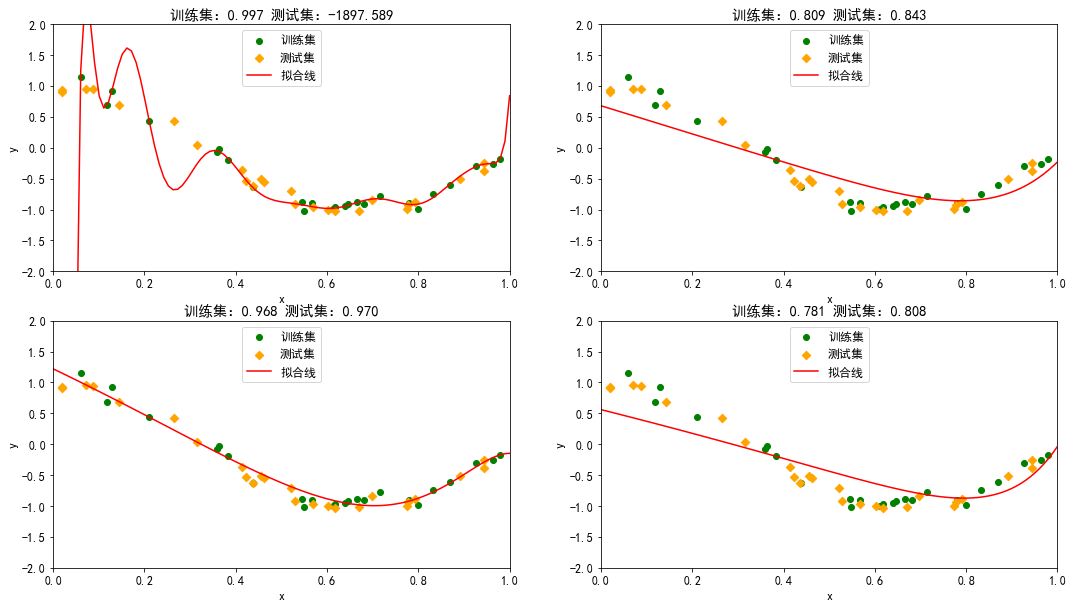

In [15]:
from sklearn.linear_model import ElasticNet
# 将字体改回中文字体。
plt.rcParams["font.family"] = "SimHei"
np.random.seed(0)
x = np.random.rand(50)
y = true_fun(x) + np.random.randn(len(x)) * 0.1
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
models = [("线性回归（无正则化）", LinearRegression()), ("L1正则化：", Lasso(alpha=0.02)),
("L2正则化", Ridge(alpha=0.02)), ("弹性网络", ElasticNet(alpha=0.02,
l1_ratio=0.5))]
plt.figure(figsize=(18, 10))
for i, (name, model) in enumerate(models):
    plt.subplot(2, 2, i + 1)
    pipe = Pipeline([("poly", PolynomialFeatures(degree=15, include_bias=False)),
    ("model", model)])
    fit_and_plot(pipe)
    print(model.coef_)

L1正则化： 0.001
L2正则化 0.05
弹性网络 0.001


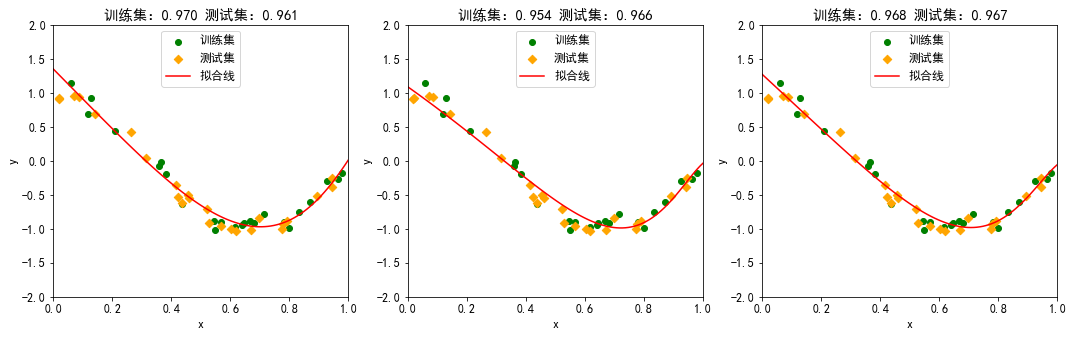

In [16]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
models = [("L1正则化：", LassoCV(max_iter=5000)), ("L2正则化", RidgeCV()), ("弹性网络", ElasticNetCV(l1_ratio=0.5))]
plt.figure(figsize=(18, 5))
for i, (name, model) in enumerate(models):
    plt.subplot(1, 3, i + 1)
    pipe = Pipeline([("poly", PolynomialFeatures(degree=15)), ("model", model)])
    # 将模型设置为10折交叉验证，其实在models中，各个模型的构造器中，可以指定cv=10,但是需要三个都指定。
    # 这里在循环中，只需要使用一行代码就可以了。
    pipe.set_params(model__cv=10)
    pipe.set_params(model__alphas=alphas)
    fit_and_plot(pipe)
    # 输出最佳的超参数alpha。
    print(name, model.alpha_)